In [ ]:
pip install transformers torch

In [ ]:
pip install torch torchvision matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 55.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

1. Basic Pipeline Setup
•	Import the pipeline function from transformers.
•	Initialize a question-answering pipeline using the default model.
•	Ask a question based on the given context.


In [ ]:
from transformers import pipeline

# Initialize question-answering pipeline with default model
qa_pipeline = pipeline("question-answering")

# Sample context and question
context = "Charles Babbage is known as the father of the computer. He designed the Analytical Engine in the 1830s."
question = "Who is known as the father of the computer?"

# Run QA pipeline
result = qa_pipeline(question=question, context=context)

print("Answer:", result['answer'])
print("Score:", result['score'])
print("Start index:", result['start'])
print("End index:", result['end'])


No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


Answer: Charles Babbage
Score: 0.997850239276886
Start index: 0
End index: 15


2. Use a Custom Pretrained Model
•	Switch to a different QA model like deepset/roberta-base-squad2.
Expected output
•	'answer': 'Charles Babbage'
•	'score' greater than 0.70
•	Include 'start' and 'end' indices


In [ ]:
from transformers import pipeline

# Use custom model for QA
qa_pipeline = pipeline("question-answering", model="deepset/roberta-base-squad2")

context = "Charles Babbage is known as the father of the computer. He designed the Analytical Engine in the 1830s."
question = "Who is known as the father of the computer?"

# Run QA pipeline
result = qa_pipeline(question=question, context=context)

print("Answer:", result['answer'])
print("Score:", result['score'])
print("Start index:", result['start'])
print("End index:", result['end'])


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/496M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/79.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

Device set to use cuda:0


Answer: Charles Babbage
Score: 0.9887442588806152
Start index: 0
End index: 15


3. Test on Your Own Example
•	Write your own 2–3 sentence context.
•	Ask two different questions from it and print the answers.
Expected output
•	Include a relevant, meaningful 'answer' to each question
•	Display a 'score' above 0.70 for each answer


In [ ]:
from transformers import pipeline

# Initialize with a good QA model
qa_pipeline = pipeline("question-answering", model="deepset/roberta-base-squad2")

# Custom context
context = ("The Mars Rover Perseverance landed on Mars in February 2021. "
           "It is tasked with searching for signs of ancient microbial life and collecting rock samples.")

# Question 1
question1 = "When did the Perseverance land on Mars?"
result1 = qa_pipeline(question=question1, context=context)

# Question 2
question2 = "What is the mission of Perseverance?"
result2 = qa_pipeline(question=question2, context=context)

# Display results
print("\nQ1:", question1)
print("Answer:", result1['answer'])
print("Score:", result1['score'])

print("\nQ2:", question2)
print("Answer:", result2['answer'])
print("Score:", result2['score'])


Device set to use cuda:0



Q1: When did the Perseverance land on Mars?
Answer: February 2021
Score: 0.9228509068489075

Q2: What is the mission of Perseverance?
Answer: searching for signs of ancient microbial life and collecting rock samples
Score: 0.7547444701194763


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

1.	Modify a basic GAN to accept a digit label as input.

In [ ]:
# Basic setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

mnist = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
dataloader = DataLoader(mnist, batch_size=128, shuffle=True)


100%|██████████| 9.91M/9.91M [00:00<00:00, 16.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 480kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.45MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.52MB/s]


2.	Concatenate the label embedding with both:
o	the noise vector (input to Generator),
o	the image input (to the Discriminator).


In [ ]:
class Generator(nn.Module):
    def __init__(self, noise_dim=100, label_dim=10, output_dim=784):
        super(Generator, self).__init__()
        self.label_emb = nn.Embedding(10, label_dim)

        self.model = nn.Sequential(
            nn.Linear(noise_dim + label_dim, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, 1024),
            nn.ReLU(True),
            nn.Linear(1024, output_dim),
            nn.Tanh()
        )

    def forward(self, noise, labels):
        label_input = self.label_emb(labels)
        x = torch.cat([noise, label_input], dim=1)
        return self.model(x)


3.	Train the cGAN on MNIST and generate digits conditioned on specific labels (e.g., generate only 3s or 7s).

In [ ]:
class Discriminator(nn.Module):
    def __init__(self, input_dim=784, label_dim=10):
        super(Discriminator, self).__init__()
        self.label_emb = nn.Embedding(10, label_dim)

        self.model = nn.Sequential(
            nn.Linear(input_dim + label_dim, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img, labels):
        label_input = self.label_emb(labels)
        x = torch.cat([img, label_input], dim=1)
        return self.model(x)


4.	Visualize generated digits label by label (e.g., one row per digit class).

In [ ]:
# Instantiate models
G = Generator().to(device)
D = Discriminator().to(device)

# Loss and optimizers
criterion = nn.BCELoss()
optimizer_G = optim.Adam(G.parameters(), lr=0.0002)
optimizer_D = optim.Adam(D.parameters(), lr=0.0002)

epochs = 50
noise_dim = 100

for epoch in range(epochs):
    for imgs, labels in dataloader:
        batch_size = imgs.size(0)
        real_imgs = imgs.view(batch_size, -1).to(device)
        labels = labels.to(device)

        # Real and fake labels
        valid = torch.ones(batch_size, 1).to(device)
        fake = torch.zeros(batch_size, 1).to(device)

        # Train Generator
        optimizer_G.zero_grad()
        z = torch.randn(batch_size, noise_dim).to(device)
        gen_labels = torch.randint(0, 10, (batch_size,)).to(device)
        gen_imgs = G(z, gen_labels)
        g_loss = criterion(D(gen_imgs, gen_labels), valid)
        g_loss.backward()
        optimizer_G.step()

        # Train Discriminator
        optimizer_D.zero_grad()
        real_loss = criterion(D(real_imgs, labels), valid)
        fake_loss = criterion(D(gen_imgs.detach(), gen_labels), fake)
        d_loss = (real_loss + fake_loss) / 2
        d_loss.backward()
        optimizer_D.step()

    print(f"Epoch {epoch+1}/{epochs} | D loss: {d_loss.item():.4f} | G loss: {g_loss.item():.4f}")


Epoch 1/50 | D loss: 0.0008 | G loss: 8.9351
Epoch 2/50 | D loss: 0.0020 | G loss: 6.3264
Epoch 3/50 | D loss: 0.0200 | G loss: 4.8601
Epoch 4/50 | D loss: 0.0688 | G loss: 10.8634
Epoch 5/50 | D loss: 0.7946 | G loss: 3.5127
Epoch 6/50 | D loss: 0.5660 | G loss: 9.0292
Epoch 7/50 | D loss: 0.2875 | G loss: 1.8692
Epoch 8/50 | D loss: 0.0440 | G loss: 3.7954
Epoch 9/50 | D loss: 0.0221 | G loss: 3.6106
Epoch 10/50 | D loss: 0.0612 | G loss: 4.1132
Epoch 11/50 | D loss: 0.0684 | G loss: 7.8202
Epoch 12/50 | D loss: 0.1291 | G loss: 4.2022
Epoch 13/50 | D loss: 0.1093 | G loss: 4.9832
Epoch 14/50 | D loss: 0.0987 | G loss: 5.5869
Epoch 15/50 | D loss: 0.0290 | G loss: 5.4297
Epoch 16/50 | D loss: 0.0583 | G loss: 4.2821
Epoch 17/50 | D loss: 0.0288 | G loss: 8.2611
Epoch 18/50 | D loss: 0.0034 | G loss: 7.7284
Epoch 19/50 | D loss: 0.0681 | G loss: 7.4062
Epoch 20/50 | D loss: 0.0382 | G loss: 7.7746
Epoch 21/50 | D loss: 0.0226 | G loss: 7.8111
Epoch 22/50 | D loss: 0.0176 | G loss: 8.9

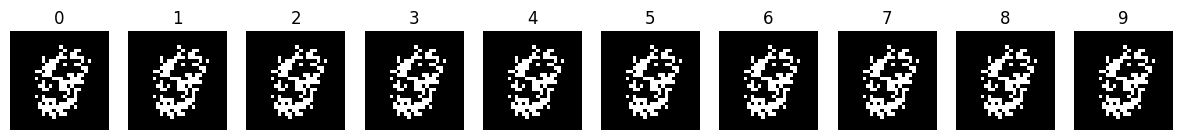

In [ ]:
def show_generated_images():
    G.eval()
    n_classes = 10
    z = torch.randn(n_classes, noise_dim).to(device)
    labels = torch.arange(0, 10).to(device)
    gen_imgs = G(z, labels).detach().cpu().view(-1, 1, 28, 28)

    fig, axs = plt.subplots(1, 10, figsize=(15, 2))
    for i in range(10):
        axs[i].imshow(gen_imgs[i][0], cmap='gray')
        axs[i].axis('off')
        axs[i].set_title(f"{i}")
    plt.show()

show_generated_images()
